# Análisis de datos con Pyhon - Pre-entrega
Nombre y apellido: DE GARATE, ESTEBAN ALEJANDRO  
   
Comisión: TT252813 - 2C2025 Lunes 19 hs
  
.   



# Etapa 1

## Script básico
Actividades 2 y 3

In [ ]:
# Generamos una lista de diccionarios que contenga algunos datos
ventas = [
  {'producto': 'notebook', 'precio': 1500.0, 'cantidad': 3},
  {'producto': 'monitor', 'precio': 500.0, 'cantidad': 5},
  {'producto': 'mouse', 'precio': 20.0, 'cantidad': 15}
]

In [ ]:
# Calculamos las ventas acumuladas - map
venta_acumuladas = sum( map( lambda venta: venta["precio"] * venta["cantidad"], ventas))
venta_acumuladas

7300.0

In [ ]:
# Calculamos las ventas acumuladas - listas por comprensión
venta_acumuladas = sum( [venta["precio"] * venta["cantidad"] for venta in ventas])
venta_acumuladas

7300.0

## Import Datasets
Actividad 1

In [1]:
import pandas as pd

In [2]:
# Import dataset ventas
url = "https://github.com/alex-degarate/TT-2C2025-Data-Analitycs-Notebooks/raw/refs/heads/main/PreEntrega/Datasets/"
df_ventas = pd.read_csv( url + "ventas.csv")


In [3]:
# Import dataset clientes
df_clientes = pd.read_csv( url + "clientes.csv")

In [4]:
# Import dataset marketing
df_marketing = pd.read_csv( url + "marketing.csv")

In [5]:
df_ventas.head(3)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos


## Dataframe VENTAS

### Análisis exploratorio de **datos**
Actividad 4

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [6]:
# Aplicamos info() para familiarizarnos con el dataframe
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB


In [7]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_ventas.head()

display(df_ventas.head())

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


In [8]:
# Usar sample() para tomar registros al azar
df_ventas.sample(5)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
1586,2006,Laptop,$86.67,3.0,30/06/2024,Electrónica
2084,2361,Parlantes Bluetooth,$112.56,8.0,31/08/2024,Electrónica
1082,124,Jarrón decorativo,$93.39,7.0,30/04/2024,Decoración
2416,1890,Plancha de vapor,$102.24,9.0,12/10/2024,Electrodomésticos
242,2228,SmartWatch,$100.06,7.0,29/01/2024,Electrónica


In [9]:
# Analizamos el campo precio
# Si es numerico se puede aplicar describe()
df_ventas["precio"].sample(5)

,precio
1841,$83.17
1319,$100.45
2923,$124.17
1013,$37.94
659,$89.06


In [ ]:
# Analizamos el campo cantidad
# si es numerico se puede aplicar describe()
df_ventas["cantidad"].sample(5)

,cantidad
852,7.0
157,12.0
1191,1.0
1153,1.0
2703,12.0


In [10]:
# Analizamos el campo fecha_venta
df_ventas["fecha_venta"].sample(5)

,fecha_venta
1598,02/07/2024
1523,23/06/2024
2699,19/11/2024
1788,26/07/2024
2463,21/10/2024


In [11]:
# Analizamos el campo categoria
# Probar con value_counts y unique
df_ventas["categoria"].value_counts()

,count
categoria,
Decoración,1015
Electrónica,1012
Electrodomésticos,1008


In [12]:
df_ventas["categoria"].unique()


array(['Decoración', 'Electrodomésticos', 'Electrónica'], dtype=object)

### Calidad de datos
Actividad 5

In [13]:
# Buscamos registros duplicados
df_ventas.duplicated().sum()

np.int64(35)

In [14]:
# Visualizamos los duplicados
# keep: 'first', 'last', False
df_ventas[df_ventas.duplicated(keep=False)].sort_values(by="id_venta")

,id_venta,producto,precio,cantidad,fecha_venta,categoria
820,56,Cortinas,$66.24,5.0,05/04/2024,Decoración
826,56,Cortinas,$66.24,5.0,05/04/2024,Decoración
832,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
844,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
878,204,Jarrón decorativo,$94.75,1.0,08/04/2024,Decoración
...,...,...,...,...,...,...
830,2545,Auriculares,$32.81,11.0,05/04/2024,Electrónica
883,2705,Auriculares,$87.29,2.0,08/04/2024,Electrónica
889,2705,Auriculares,$87.29,2.0,08/04/2024,Electrónica
831,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica


In [15]:
# Buscamos datos nulos
df_ventas.isnull().sum()

,0
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


In [16]:

# Visualizar los nulos
# df_ventas[df_ventas.isnull().any(axis=1)]
nulos_lista = df_ventas[df_ventas.isnull().any(axis=1)]
df_ventas[df_ventas.isnull().any(axis=1)]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
136,627,Elementos de cerámica,NaN,NaN,17/01/2024,Decoración
139,2171,Parlantes Bluetooth,NaN,NaN,17/01/2024,Electrónica


In [17]:
# Hay 2 registros con nulos, en el mismo registro, los campos "precio" y "cantidad son nulos
# No se pueden rescatar y van a ser eliminados
nulos_numero  = len( nulos_lista)
nulos_porcentaje = nulos_numero * 100 / len(df_ventas)
print(f"Numero de nulos: {nulos_numero } registros")
print(f"Porcentaje de nulos: {nulos_porcentaje:.2f}% registros")


Numero de nulos: 2 registros
Porcentaje de nulos: 0.07% registros


In [18]:
# Analizar los precios de los NaN a ver que opciones tenemos
# df_ventas[df_ventas["producto"]=="Elementos de cerámica"]
# df_ventas["producto"].value_counts()
df_ventas["producto"].unique()


array(['Cuadro decorativo', 'Lámpara de mesa', 'Secadora', 'Heladera',
       'Horno eléctrico', 'Plancha de vapor', 'Proyector',
       'Rincón de plantas', 'Candelabro', 'Aspiradora',
       'Freidora eléctrica', 'Tablet', 'Cortinas', 'Adorno de pared',
       'Jarrón decorativo', 'Lavadora', 'Auriculares', 'Cámara digital',
       'Cafetera', 'Consola de videojuegos', 'Smartphone',
       'Elementos de cerámica', 'Espejo decorativo',
       'Parlantes Bluetooth', 'SmartWatch', 'Microondas', 'Batidora',
       'Alfombra', 'Televisor', 'Laptop'], dtype=object)

### Observaciones: VENTAS




* Cantidad de registros originales: 3035
* Columnas/campos originales: 6
* 35 registros duplicados &emsp; => eliminarlos
*  2 registros con datos nulos: id:[136, 139], < 0.1 % total &emsp; =>  dropna
* Campo precio: tipo objeto con `$`, removerlo y luego cambiar el dtype a float64
* Campo fecha: ajustar a dtype datetime

## Dataframe MARKETING

### Analisis exploratorio de datos

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [19]:
# Aplicamos info() para familiarizarnos con el dataframe
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [20]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
pd.set_option('display.max_rows', None)
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


In [21]:
# Analizamos el campo costo
df_marketing["costo"].sample(5)

,costo
61,6.00
51,6.47
42,5.57
39,4.90
18,4.66


In [22]:
# Analizamos el campo fecha_inicio
df_marketing["fecha_inicio"].sample(5)

,fecha_inicio
79,11/11/2024
38,17/07/2024
10,27/04/2024
5,01/04/2024
70,22/10/2024


In [23]:
# Analizamos el campo fecha_fin
df_marketing["fecha_fin"].sample(5)

,fecha_fin
57,17/10/2024
65,27/10/2024
78,23/12/2024
46,25/08/2024
17,12/07/2024


### Calidad de los datos


In [24]:
# Buscamos registros duplicados
df_marketing.duplicated().sum()

np.int64(0)

In [25]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


.  

### Observaciones: MARKETING

El dataframe DF_MARKETING tiene 90 registros

No hay registros duplicados

El campo fecha_inicio es objeto &emsp; => cambiar a dtype datetime

El campo fecha_fin &emsp; es objeto &emsp; => cambiar a dtype datetime


.  


## Dataframe CLIENTES

### Analisis exploratorio de datos

In [26]:
# Aplicamos info() para familiarizarnos con el dataframe
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB


In [27]:
#df_clientes[500:]

In [ ]:
# Visualizamos los primeros registros con head()
df_clientes.head(1)

,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68


In [28]:
# Buscamos registros duplicados
df_clientes.duplicated().sum()

np.int64(0)

In [29]:
# Buscamos datos nulos
df_clientes.isnull().sum()

,0
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


.  


### Observaciones

El dataframe CLIENTES tiene 567 registros.

No hay registros duplicados

No hay registros con valores nulos

El campo ciudad tiene ciudades con vocales acentuadas (poner vocales sin acento)

El campo nombre tiene nombres con apostrofe (sacar apostrofe)

###Calidad de los datos

In [30]:
# visualizamos las ciudades con vocales acentuadas y tilde (áéíóúñ)
ciudades_acentos = df_clientes[df_clientes["ciudad"].str.contains(r'[áéíóúñ]',regex=True)]

#display(ciudades_acentos.head())
# df_clientes[df_clientes["ciudad"].str.contains('á')].count()     # => 39
# df_clientes[df_clientes["ciudad"].str.contains('é')].count()     # => 0
# df_clientes[df_clientes["ciudad"].str.contains('í')].count()     # => 44
# df_clientes[df_clientes["ciudad"].str.contains('ó')].count()     # => 49
# df_clientes[df_clientes["ciudad"].str.contains('ú')].count()     # => 0
# df_clientes[df_clientes["ciudad"].str.contains('ñ')].count()     # => 0

ciudades_acentos.count()


,0
id_cliente,132
nombre,132
edad,132
ciudad,132
ingresos,132


In [43]:
# reemplazamos las vocales acentuadas por otras sin acento
# y (opcionalmente) podemos guardar en una nueva columna "city_normal"
import re

def replace_accented(match):
    char = match.group(0)
    mapping = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u'}
    return mapping.get(char, char)

# 1 y 2 funcionan OK
# 1 df_clientes['city_normal'] = df_clientes['ciudad'].str.replace(r'[áéíóú]', replace_accented, regex=True)
# 2
df_clientes['ciudad'] = df_clientes['ciudad'].str.replace(r'[áéíóú]', lambda match: replace_accented(match), regex=True)
'''
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('á','a')
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('é','e')
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('í','i')
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('ó','o')
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('ú','u')
# comparar resultados
display(df_clientes.loc[100:110,['ciudad', 'city_normal']].sample(10))
'''
display(df_clientes.loc[100:110,['ciudad']].sample(10))


,ciudad
110,Mar del Plata
105,Bahia Blanca
106,Bahia Blanca
100,Merlo
108,Buenos Aires
101,Salta
107,Mar del Plata
109,Mar del Plata
102,San Miguel de Tucuman
103,Posadas


In [38]:
# nombres con apostrofes u otros
# Esta linea busca caracteres distintos de letras y espacio
metodo1 = df_clientes[df_clientes["nombre"].str.strip().str.contains(r"[^a-zA-Z\s+]", regex=True)].count()

# Esta linea busca especificamente por apostrofe, guion medio y punto
metodo2 = df_clientes[df_clientes["nombre"].str.contains(r"['-.]", regex=True)].count()

print(f"Metodo 1:\n {metodo1}")
print(f"\nMetodo 2:\n {metodo2}")



Metodo 1:
 id_cliente    15
nombre        15
edad          15
ciudad        15
ingresos      15
dtype: int64

Metodo 2:
 id_cliente    15
nombre        15
edad          15
ciudad        15
ingresos      15
dtype: int64


.  

# Etapa 2



## Limpieza de datos
Actividad 1 - Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

.  

### Dataframe VENTAS

* 35 duplicados, eliminarlos - se eliminaron 35 duplicados &emsp; => Ok
* Algunos nulos (2), 1% del faltante, dropna - se eliminaron 2 registros con 2 NaN
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64 - Ok
* Campo fecha: ajustar a dtype datetime - Ok

In [44]:
# Eliminamos registros duplicados
# atributos a evaluar, keep, ignore_index, inplace
df_ventas.drop_duplicates(inplace=True, ignore_index=True)

In [40]:
# Validamos que no haya duplicados
df_ventas.duplicated().sum()

np.int64(0)

In [41]:
# Eliminamos registros con datos nulos
df_ventas.dropna(inplace=True)

In [45]:
# Validamos que no haya nulos
# df_ventas.isnull().sum()
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     2998 non-null   int64  
 1   producto     2998 non-null   object 
 2   precio       2998 non-null   object 
 3   cantidad     2998 non-null   float64
 4   fecha_venta  2998 non-null   object 
 5   categoria    2998 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 140.7+ KB


In [46]:
# Eliminamos el caracter especial $ de precio
# Normalización: usar replace()
# De ser necesario, podemos usar el atributo regex=True
df_ventas["precio"] = df_ventas["precio"].str.strip().str.replace("$", "")

In [47]:
# Validamos que precio no contenga $
df_ventas["precio"].sample(3)

,precio
432,116.25
1660,80.56
348,87.04


In [48]:
# Convertimos precio de str a float
# Podemos usar pd.to_numeric o astype o incluso combinarlos
df_ventas["precio"] = df_ventas["precio"].astype(float)


In [49]:
# Convertir el dtype de cantidad, de float64 a int64
df_ventas["cantidad"]= df_ventas["cantidad"].astype(int)

In [50]:
# Validar la conversion a int
df_ventas["cantidad"].dtypes


dtype('int64')

In [51]:
# Validamos campos numericos
df_ventas[["precio","cantidad"]].sample(3)

,precio,cantidad
712,116.66,12
1646,36.52,9
1921,74.82,11


In [52]:
# Convertir el campo fecha_venta a dtype datetime
# pd.to_datetime(df_ventas["fecha_venta"], format="%d/%m/%Y")
# pd.to_datetime(df_ventas["fecha_venta"], dayfirst=True)
df_ventas['fecha_venta'] = pd.to_datetime(df_ventas['fecha_venta'], format="%d/%m/%Y")

In [53]:
# Validar la conversion de fecha
df_ventas['fecha_venta'].dtype




dtype('<M8[ns]')

In [54]:
# Renombrar ventas["precio"] a ventas["precio_unit"]  porque me resulta confuso
df_ventas.rename(columns={"precio": "precio_unit"}, inplace=True)

In [55]:
# Validar cambios
df_ventas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio_unit  2998 non-null   float64       
 3   cantidad     2998 non-null   int64         
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 140.7+ KB


In [61]:
# Hacemos una copia del DF ventas y guardamos a disco como csv
df_ventas_final = df_ventas.copy()

#df_ventas_final.to_csv("df_ventas_final.csv", index=False)

In [62]:
df_ventas_final.head()


,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos


VENTAS  
El df_ventas_final contiene 2998 registros  
   

   

.  
  

================================================================================
  


### Dataframe marketing

ACCIONES

Convertir el campo fecha_inicio a dtype = datetime  
Convertir el campo fecha_fin    a dtype = datetime

In [63]:
# Convertir el campo fecha_inicio a dtype datetime
df_marketing['fecha_inicio'] = pd.to_datetime(df_marketing['fecha_inicio'], format="%d/%m/%Y")

In [64]:
# Convertir el campo fecha_fin a dtype datetime
df_marketing['fecha_fin'] = pd.to_datetime(df_marketing['fecha_fin'], format="%d/%m/%Y")

In [65]:
# Validamos los cambios
df_marketing[["fecha_inicio","fecha_fin"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha_inicio  90 non-null     datetime64[ns]
 1   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.5 KB


In [67]:
# Hacemos una copia del df_marketing
df_marketing_final = df_marketing.copy()

# Guardamos la copia a disco
df_marketing_final.to_csv('df_marketing_final.csv', index=False)

df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


In [68]:
df_marketing.head(9)

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05
5,85,SmartWatch,TV,5.07,2024-04-01,2024-05-05
6,36,Plancha de vapor,Email,5.41,2024-04-02,2024-06-01
7,57,Batidora,Email,4.48,2024-04-10,2024-06-08
8,44,Adorno de pared,Email,5.08,2024-04-13,2024-05-10


   
   
### Dataframe clientes  


In [69]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB


In [70]:
df_clientes.head()


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahia Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


In [74]:
# Hacemos una copia del df_clientes
df_clientes_final = df_clientes.copy()

# Guardamos la copia a disco
df_clientes_final.to_csv('df_clientes_final.csv', index=False)

.  

# **Transformación de datos**
Actividad 2 - Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

In [75]:
df_ventas_final.head(2)

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración


In [77]:
# Transformación:
# Calculamos el valor de cada venta = precio_unit * cantidad

# Agregamos una nueva columna  valor_venta = monto
df_ventas_final["valor_venta"] = df_ventas_final["precio_unit"] * df_ventas["cantidad"]

In [78]:
# Visualizamos
df_ventas_final.head(2)

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [80]:
# Agregación:
# Agrupar valor_venta por producto
# Sumamos las ventas dentro de cada grupo
tabla_ventas = (df_ventas_final.groupby("producto", as_index=False)["valor_venta"].sum())
tabla_ventas.head()

,producto,valor_venta
0,Adorno de pared,48093.49
1,Alfombra,44773.06
2,Aspiradora,50085.86
3,Auriculares,74175.58
4,Batidora,50979.20


In [81]:
# Usemos describe para analizar algunos valores del dataframe resultante
tabla_ventas.describe()

,valor_venta
count,30.000000
mean,48903.117333
std,13265.561715
min,11128.800000
25%,45601.920000
50%,48140.245000
75%,51092.960000
max,82276.380000


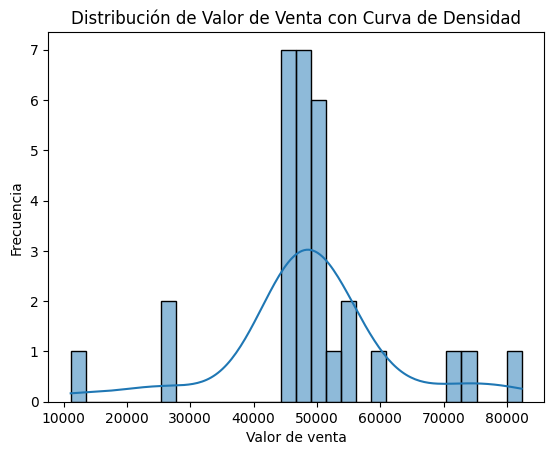

In [82]:
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(tabla_ventas["valor_venta"], bins=30, kde=True, edgecolor="black")
plt.title("Distribución de Valor de Venta con Curva de Densidad")
plt.xlabel("Valor de venta")
plt.ylabel("Frecuencia")
plt.show()

### Alto Rendimiento
Los productos de alto rendimiento son aquellos que maximizan su utilidad, rentabilidad o eficiencia (se tomará quartil 75 )

In [83]:
# Calcular el percentil 75 (umbral de alto rendimiento)
umbral_ventas = tabla_ventas["valor_venta"].quantile(0.75)
umbral_ventas

np.float64(51092.96)

In [ ]:
# Identificar productos que superan el umbral
# productos_top = tabla_ventas.query("valor_venta >= @umbral")
productos_top = tabla_ventas[tabla_ventas["valor_venta"] >= umbral_ventas]
productos_top

## Agregación
Actividad 3 - Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [85]:
df_ventas_final.columns

Index(['id_venta', 'producto', 'precio_unit', 'cantidad', 'fecha_venta',
       'categoria', 'valor_venta'],
      dtype='object')

In [86]:
# Agrupamos por categoria y agregamos el total valor_venta por categoria
# (solo son 3 categorías )
ventas_categoria = df_ventas_final.groupby("categoria", as_index=False)["valor_venta"].sum()
ventas_categoria.head()

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


In [88]:
# Ordenar y mostrar los resultados
ventas_categoria.sort_values(by="valor_venta", ascending=False, inplace=True)
ventas_categoria

,categoria,valor_venta
1,Electrodomésticos,505299.63
2,Electrónica,482577.80
0,Decoración,479216.09


.  


## Integración de datos
Actividad 4 - Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [89]:
df_ventas_final.head(2)

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [96]:
df_ventas_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio_unit  2998 non-null   float64       
 3   cantidad     2998 non-null   int64         
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
 6   valor_venta  2998 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 164.1+ KB


In [99]:
# df_marketing_final.info()

df_marketing_final.head()


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05


In [102]:
# Vemos la cantidad de productos unicos en ventas
df_ventas["producto"].nunique()


30

In [103]:
# Vemos la cantidad de productos unicos en marketing
df_marketing["producto"].nunique()

30

In [104]:

#df_marketing2 = df_marketing.sort_values(by="producto", ascending=True)
df_marketing.head(6)

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05
5,85,SmartWatch,TV,5.07,2024-04-01,2024-05-05


In [ ]:
# Unir los datasets ventas y marketing por columna 'producto'
ventas_marketing = pd.merge(df_ventas_final, df_marketing, on="producto", how="left")

In [ ]:
# Verificar coincidencias (muestra)
ventas_marketing.head(6)

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta,id_campanha,canal,costo,fecha_inicio,fecha_fin
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,1,RRSS,5.27,2024-04-27,2024-06-04
1,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,31,Email,5.28,2024-08-15,2024-09-12
2,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,61,TV,5.30,2024-11-05,2024-12-23
3,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,32,Email,5.54,2024-03-28,2024-04-20
4,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,2,RRSS,5.88,2024-05-30,2024-06-29
5,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,62,TV,4.51,2024-08-26,2024-10-07


### Analizamos el impacto de la campaña

In [ ]:
# Nos quedamos solo con los registros de ventas durante la campaña de marketing
# Seleccionamos solo los campos que nos interesan: "producto", "valor_venta", "costo"
ventas_campaing = ventas_marketing[["producto", "valor_venta", "costo"]]
ventas_campaing.head()

,producto,valor_venta,costo
0,Cuadro decorativo,349.7,5.27
1,Cuadro decorativo,349.7,5.28
2,Cuadro decorativo,349.7,5.30
3,Lámpara de mesa,525.5,5.54
4,Lámpara de mesa,525.5,5.88


In [ ]:
# Agrupamos por producto y hacemos una agregación por "valor de venta" y "costo"
ventas_marketing.groupby("categoria")[["valor_venta","costo"]].sum()

,valor_venta,costo
categoria,,
Decoración,1437648.27,15774.86
Electrodomésticos,1515898.89,14644.65
Electrónica,1447733.40,14243.90


In [ ]:
# Generamos una nueva columna con la diferencia entre lo vendido y lo invertido en la campaña


================================================================================
# ANEXO

## PROBABLES MEJORAS A FUTURO
1 Crear lista categorias = df_ventas_final["categoria"].unique()  

2 Crear tabla df_producto con id_producto, producto, id_categoria, categoria

Se observo:
1. Las ventas contienen productos con la misma denominacion, sin ninguna id como para identificarlos. Pertenecen a distintas ventas individuales y tienen distinto precio.

2. Por tal razon es dificil hacer una evaluación seria del resultado de la campaña publicitaria, porque corresponde a distintos productos agrupados, con precio sin adjudicar.

3. La campaña de marketing posee el costo publicitario por producto (generico/agregado) pero no hay como relacionarlo con el costo_unitario, ni con el precio_venta

4. Sacar un precio_promedio, no estoy seguro que sirva mucho, porque la venta podria haberse hecho a un valor menor que el precio_unitario_promedio, debido a la gran dispersión de precios

Hemos visto que para el producto "Adorno de pared", los precios estan distibuidos en 3 segmentos o rangos, la idea es hacer un promedio por rango y
luego renombrar los productos segun el rango, por ej:
"Adorno de pared" => "Adorno de pared R1"
De esta manera en lugar de tener 90
  


In [93]:
# Hacemos una copia para hacer pruebas
df_pp_ventas = df_ventas_final.copy()
df_pp_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio_unit  2998 non-null   float64       
 3   cantidad     2998 non-null   int64         
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
 6   valor_venta  2998 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 164.1+ KB


In [107]:
df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"].count()
# "producto"] == "Adorno de pared"] hay => 100
# df_pp_ventas.sort_values(by="producto", ascending=True, inplace=False)

df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"]

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta
17,630,Adorno de pared,71.99,9,2024-01-04,Decoración,647.91
38,560,Adorno de pared,57.62,6,2024-01-07,Decoración,345.72
72,830,Adorno de pared,67.23,10,2024-01-10,Decoración,672.30
101,20,Adorno de pared,90.21,2,2024-01-14,Decoración,180.42
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración,913.32
141,430,Adorno de pared,81.76,5,2024-01-18,Decoración,408.80
151,30,Adorno de pared,76.92,6,2024-01-19,Decoración,461.52
185,80,Adorno de pared,51.56,5,2024-01-23,Decoración,257.80
221,310,Adorno de pared,103.79,2,2024-01-27,Decoración,207.58
255,50,Adorno de pared,83.10,5,2024-01-31,Decoración,415.50


In [108]:
df_pp_ventas.head()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84


In [ ]:
#df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"].count()
# "producto"] == "Adorno de pared"] hay => 100
df_pp_ventas.sort_values(by="producto", ascending=True, inplace=True)
df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"]

# "Cuadro decorativo"] hay 100
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].count()
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].mean()

In [ ]:
#df_pp_ventas = df_pp_ventas.sort_values(by="producto", ascending=True)
df_pp_ventas[df_pp_ventas["producto"] == "Adorno de pared"].head(100)

#sort_values(by="valor_venta", ascending=False, inplace=True)
#df_pp_ventas.head()

In [ ]:
'''
# Crear a nuevo DF con productos unicos y sus categorias de df_pp_ventas
df_producto = df_pp_ventas[["producto", "categoria"]].drop_duplicates().reset_index(drop=True)

# Create a unique id_producto for each product
df_producto["id_producto"] = df_producto.index + 1

# Create a unique id_categoria for each category
df_producto["id_categoria"] = df_producto["categoria"].astype('category').cat.codes + 1

# Reorder columns to match the requested order
df_producto = df_producto[["id_producto", "producto", "id_categoria", "categoria"]]

# Visualizar el nuevo DF
display(df_producto.head())
'''

In [ ]:
# ventas_categoria.sort_values(by="valor_venta", ascending=False, inplace=True)
# mal df_pp_ventas[df_pp_ventas["producto"]].sum()

# IMPRIMIR la lista de productos ordenados alfabeticamente y las ventas
#----------------------------------------------------
#    df_pp_ventas["producto"].value_counts().sort_index()
#---------------------------------------------------

In [ ]:
df_pp_ventas[["producto"] == "Adorno de pared"]["precio_unit"] #.mean()

In [ ]:
# Filtramos el DF por el producto "Adorno de pared" y calculamos la media de 'precio_unit'
mean_precio_adorno_pared = df_pp_ventas[df_pp_ventas["producto"] == "Adorno de pared"]["precio_unit"].mean()

print(f"El precio promedio para 'Adorno de pared' es: {mean_precio_adorno_pared:.2f}")

In [ ]:
df_adorno_pared = df_pp_ventas[df_pp_ventas["producto"] == "Adorno de pared"].copy()

media = df_adorno_pared["precio_unit"].mean()
print(f"The mean price for 'Adorno de pared' is: {media:.2f}")
df_adorno_pared.describe()

In [ ]:
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.histplot(df_adorno_pared["precio_unit"], bins=15, kde=True, edgecolor="black")
plt.title("Distribución de precio_unit ")
plt.xlabel("Precio Unitario ($)")
plt.ylabel("Frecuencia")

# Seteamos x-axis ticks a intervalo s de 10
plt.xticks(np.arange(0, df_adorno_pared["precio_unit"].max() + 10, 10))

plt.show()

In [ ]:
# Calculamos percentilo 33 de 'precio_unit'
q33_precio_adorno_pared = df_adorno_pared["precio_unit"].quantile(0.33)

print(f"The 33th percentile of the price for 'Adorno de pared' is: {q33_precio_adorno_pared:.2f}")

# Calculamos el percentilo 66 de 'precio_unit'
q66_precio_adorno_pared = df_adorno_pared["precio_unit"].quantile(0.66)
print(f"The 66th percentile of the price for 'Adorno de pared' is: {q66_precio_adorno_pared:.2f}")

In [ ]:
# Definimos los bins (puntos de corte)
bins = [25, 66, 91, 120]

# Definimos las etiquetas para los rangos
labels = ['25-66', '66-91', '91-120']

# Creamos una nueva columna 'precio_range' para estratificar 'precio_unit' dentro de los cut-off
df_adorno_pared['precio_range'] = pd.cut(df_adorno_pared['precio_unit'], bins=bins, labels=labels, right=False)

# Mostramos la cantidad de items precios en cada rango de precios
display(df_adorno_pared['precio_range'].value_counts())

# Display the first few rows with the new column
display(df_adorno_pared.head(15))

In [ ]:
# Observamos que hay 3 rangos de datos para Adorno de pared
# Calculamos esos rangos dividiendolos en terciles

# Recorre la tabla sacada de ventas_final, para el producto "Adorno de pared"
nLenght = df_adorno_pared.shape[0]
rango1 = [0, 0]
rango2 = [0, 0]
rango3 = [0, 0]

#        df_adorno_pared.iat[ num_fila, num_col ]  con indice= 0
# print( df_adorno_pared.iat[0, 2])

for i in range(nLenght):
    pu = df_adorno_pared.iat[i, 2]
    nomP = df_adorno_pared.iat[i, 1]
    if pu >= 25 and pu <=66:
        rango1[0] += pu
        rango1[1] += 1
        df_adorno_pared.iat[i, 1] = nomP + "-R1"

    elif pu > 66 and pu <=91:
        rango2[0] += pu
        rango2[1] += 1
        df_adorno_pared.iat[i, 1] = nomP + "-R2"

    elif pu > 91 and pu <=120:
        rango3[0] += pu
        rango3[1] += 1
        df_adorno_pared.iat[i, 1] = nomP + "-R3"

# Calculamos las medias x rango
media_rango1 = rango1[0]/rango1[1]
media_rango2 = rango2[0]/rango2[1]
media_rango3 = rango3[0]/rango3[1]

#Visualizamos las medias
print(f"media_rango1 : {media_rango1:.2f}")
print(f"media_rango2 : {media_rango2:.2f}")
print(f"media_rango3 : {media_rango3:.2f}")

# En las celdas de mas abajo lo graficamos

In [ ]:
display(df_adorno_pared.head(15))

In [ ]:
# @title
'''
# Calculate the sum and count for each range using boolean indexing

rango1_data = df_adorno_pared[df_adorno_pared['precio_range'] == '25-66']
rango1_sum = rango1_data['precio_unit'].sum()
rango1_count = rango1_data.shape[0]

rango2_data = df_adorno_pared[df_adorno_pared['precio_range'] == '63-93']
rango2_sum = rango2_data['precio_unit'].sum()
rango2_count = rango2_data.shape[0]

rango3_data = df_adorno_pared[df_adorno_pared['precio_range'] == '93-120']
rango3_sum = rango3_data['precio_unit'].sum()
rango3_count = rango3_data.shape[0]


print(f"Range 25-66: Sum = {rango1_sum:.2f}, Count = {rango1_count}, Average = {(rango1_sum / rango1_count):.2f}")
print(f"Range 63-93: Sum = {rango2_sum:.2f}, Count = {rango2_count}, Average = {(rango2_sum / rango2_count):.2f}")
print(f"Range 93-120: Sum = {rango3_sum:.2f}, Count = {rango3_count}, Average = {(rango3_sum / rango3_count):.2f}")
'''


In [ ]:
# @title
'''
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KDE plot
sns.kdeplot(df_adorno_pared["precio_unit"], fill=True)
plt.title("Kernel Density Estimate of Precio Unitario for Adorno de pared")
plt.xlabel("Precio Unitario ($)")
plt.ylabel("Density")
plt.show()
'''

In [ ]:
df_marketing.info()
df_marketing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05


In [ ]:
df_marketing2 = df_marketing.sort_values(by="producto", ascending=True)
df_marketing2.info()
# df_canales = df_marketing.copy()
# df_canales.head()
df_marketing2.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 86
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.9+ KB


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
8,44,Adorno de pared,Email,5.08,2024-04-13,2024-05-10
70,14,Adorno de pared,RRSS,4.16,2024-10-22,2024-12-21


In [ ]:
df_marketing2.to_csv('df_marketing2.csv', index=False)

In [ ]:
df_ventas_final.head()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84


In [ ]:
# Creamos DF con nombres productos unicos y sus categorias de df_ventas_final
df_producto = df_ventas_final[["producto", "categoria"]].drop_duplicates().reset_index(drop=True)

# Renombramos las columnas
df_producto.rename(columns={"producto": "prod_name", "categoria": "cat_name"}, inplace=True)

# ordenamos DF alfabeticamente por 'prod_name' en forma ascendente
df_producto = df_producto.sort_values(by="prod_name", ascending=True).reset_index(drop=True)

# Agregamos una column con los valores indices, ya ordenado producto
df_producto["prod_id"] = df_producto.index

# Crear una categoria'cat_id' numerica por cada categoria
df_producto["cat_id"] = df_producto["cat_name"].astype('category').cat.codes + 1

# Reordenamos columnas
df_producto = df_producto[["prod_id", "prod_name", "cat_id", "cat_name"]]

# Display the new DataFrame
display(df_producto.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prod_id    30 non-null     int64 
 1   prod_name  30 non-null     object
 2   cat_id     30 non-null     int8  
 3   cat_name   30 non-null     object
dtypes: int64(1), int8(1), object(2)
memory usage: 882.0+ bytes


None

In [ ]:
# Display the new DataFrame
display(df_producto.head(3))

,prod_id,prod_name,cat_id,cat_name
0,0,Adorno de pared,1,Decoración
1,1,Alfombra,1,Decoración
2,2,Aspiradora,2,Electrodomésticos


In [ ]:
#df_ventas_final.to_csv('df_ventas_final.csv', index=False)
df_producto.to_csv('df_producto.csv', index=False)

In [ ]:
df_ventas_final.head()


,id_venta,prod_id,producto,precio_unit,cantidad,fecha_venta,cat_id,categoria,valor_venta
0,792,9,Cuadro decorativo,69.94,5,2024-01-02,1,Decoración,349.70
1,811,19,Lámpara de mesa,105.10,5,2024-01-02,1,Decoración,525.50
2,1156,25,Secadora,97.96,3,2024-01-02,2,Electrodomésticos,293.88
3,1372,14,Heladera,114.35,8,2024-01-02,2,Electrodomésticos,914.80
4,1546,25,Secadora,106.21,4,2024-01-02,2,Electrodomésticos,424.84


In [ ]:
# @title
'''
# Merge df_ventas_final with df_producto to add the 'prod_id' column
df_ventas_final2 = pd.merge(df_ventas_final, df_producto[['prod_id', 'prod_name']], left_on='producto', right_on='prod_name', how='left')

# Drop the redundant 'prod_name' column from the merge
df_ventas_final2.drop('prod_name', axis=1, inplace=True)

# Display the updated DataFrame
display(df_ventas_final2.head())
'''

In [ ]:
# Agregar a df_ventas_final la columnas "prod_id" y cat_id
df_ventas_final = pd.merge(df_ventas_final, df_producto[['prod_id', 'prod_name', 'cat_id', 'cat_name']], left_on='producto', right_on='prod_name', how='left')

# Drop the redundant 'prod_name' and 'cat_name' columns from the merge
df_ventas_final.drop(['prod_name', 'cat_name'], axis=1, inplace=True)

# Display the updated DataFrame
display(df_ventas_final.head())

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta,prod_id,cat_id
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70,9,1
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50,19,1
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88,25,2
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80,14,2
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84,25,2


In [ ]:
df_ventas_final = df_ventas_final[[ "id_venta",	"prod_id", "producto","precio_unit", "cantidad",
                                   "fecha_venta", "cat_id","categoria", "valor_venta"]]
df_ventas_final.head()

,id_venta,prod_id,producto,precio_unit,cantidad,fecha_venta,cat_id,categoria,valor_venta
0,792,9,Cuadro decorativo,69.94,5,2024-01-02,1,Decoración,349.70
1,811,19,Lámpara de mesa,105.10,5,2024-01-02,1,Decoración,525.50
2,1156,25,Secadora,97.96,3,2024-01-02,2,Electrodomésticos,293.88
3,1372,14,Heladera,114.35,8,2024-01-02,2,Electrodomésticos,914.80
4,1546,25,Secadora,106.21,4,2024-01-02,2,Electrodomésticos,424.84


In [ ]:
df_ventas_final.to_csv('df_ventas_final4.csv', index=False)